In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [3]:
POINTS_NUM_PER_TR = 500

df = pd.read_csv('../data/all.csv')

NUM_TR = int(len(df)/POINTS_NUM_PER_TR)

In [4]:
NUM_TR

968

In [5]:
def df2array(df):
    # 将数据以 ndarray 的形式读入内存
    # [[x1,x2,...,x500,y1,y2,...,y500],[],...]
    i = 0
    data = np.array([])
    while i <= len(df)-1:
        arr_x = np.array(df['x'][i:i+POINTS_NUM_PER_TR])
        arr_y = np.array(df['y'][i:i+POINTS_NUM_PER_TR])
        arr = np.append(arr_x,arr_y)
        if len(data)==0:
            data = np.array([arr])
        else:
            data = np.append(data,[arr],axis=0)
        i+=POINTS_NUM_PER_TR
    return data

In [6]:
data = df2array(df)

In [7]:
data

array([[ 46.619,  46.59 ,  46.528, ..., -16.763, -16.738, -16.701],
       [ 42.603,  42.579,  42.515, ...,   5.021,   5.053,   5.13 ],
       [-24.227, -24.211, -24.168, ...,  19.123,  19.187,  19.264],
       ...,
       [-16.401, -16.411, -16.423, ..., -13.48 , -13.545, -13.602],
       [ 45.387,  45.359,  45.263, ...,   2.25 ,   2.221,   2.173],
       [ 14.487,  14.497,  14.524, ..., -11.821, -11.803, -11.772]])

In [8]:
# 确保定义的距离是有效的，非负性，同一性，对称性，直递性（三角不等式）

def dist(tr1,tr2):
    length = len(tr1)
    if not(length == 1000):
        # 传入参数形式为(k,1000)
        # 计算k个簇心点更新前后的距离
        distance = 0
        for i in range(length):
            pre = tr1[i]
            now = tr2[i]
            half = int(len(pre)/2)
            x1 = pre[0:half]
            y1 = pre[half:]
            x2 = now[0:half]
            y2 = now[half:]
            deta_x = x1 - x2
            deta_y = y1 - y2
            distance = distance + np.sum((deta_x**2 + deta_y**2) ** 0.5) / len(x1)
    else:       
        half = int(length/2)
        x1 = tr1[0:half]
        y1 = tr1[half:]
        x2 = tr2[0:half]
        y2 = tr2[half:]
        deta_x = x1 - x2
        deta_y = y1 - y2
        distance = np.sum((deta_x**2 + deta_y**2) ** 0.5) / len(x1)
        # print(distance)
    return distance

In [9]:
def cluster(data,K):

    metric = distance_metric(type_metric.USER_DEFINED, func=dist)
    initial_centers = kmeans_plusplus_initializer(data, K).initialize()

    kmeans_instance = kmeans(data, initial_centers, metric=metric)

    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters()
    centers = kmeans_instance.get_centers()
    
    return clusters,centers

In [10]:
# ndarray中每个元素长度要相等


def getKmeansResult(data,K):
    clusters,centers = cluster(data,K)
    labels = np.zeros(NUM_TR)
    for i in range(K):
        for j in range(NUM_TR):
            if j in clusters[i]:
                labels[j] = i
    return labels,np.array(centers)

In [11]:
def cost(data,labels,centers):
    loss = 0
    for i in range(len(data)):
        loss = loss + dist(data[i],centers[int(labels[i])])
    loss = loss / len(data)
    return loss

In [14]:
def chooseK(data,K):
    x = np.arange(3,K+1)
    y = np.zeros(len(x))
    for k in range(3,K+1):
        labels,centers = getKmeansResult(data,k)
        y[k-3] = cost(data, labels,centers)
    plt.plot(x,y)
    plt.grid(True)
    plt.show()

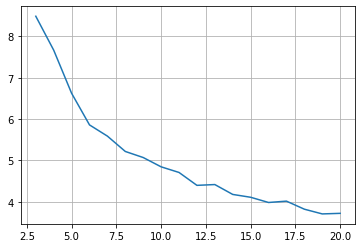

In [15]:
chooseK(data,20)

In [53]:
labels,centers = getKmeansResult(data,5)

In [54]:
labels.astype(np.int64)

array([4, 1, 2, 4, 4, 2, 3, 0, 2, 3, 1, 2, 0, 3, 0, 4, 1, 2, 3, 4, 4, 2,
       4, 3, 4, 0, 2, 3, 3, 2, 0, 4, 4, 3, 2, 4, 0, 4, 4, 0, 0, 0, 0, 1,
       4, 1, 1, 4, 0, 4, 1, 1, 4, 3, 0, 3, 0, 1, 1, 4, 4, 2, 2, 4, 0, 4,
       0, 1, 1, 2, 0, 3, 1, 0, 2, 0, 1, 0, 3, 1, 0, 1, 0, 1, 1, 4, 1, 4,
       4, 0, 0, 4, 0, 3, 2, 2, 0, 2, 4, 0, 3, 0, 4, 4, 0, 3, 3, 1, 0, 0,
       3, 0, 0, 4, 4, 0, 4, 0, 2, 0, 0, 4, 2, 3, 0, 4, 0, 2, 2, 3, 0, 2,
       4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 2, 3, 3, 4, 3, 2, 4, 3, 0, 0, 0, 1,
       1, 0, 1, 1, 3, 1, 1, 0, 1, 0, 3, 0, 0, 1, 3, 1, 4, 1, 0, 1, 2, 1,
       0, 2, 0, 2, 4, 4, 2, 0, 1, 1, 0, 0, 4, 0, 0, 0, 0, 3, 4, 0, 3, 2,
       2, 2, 3, 1, 3, 4, 2, 0, 0, 0, 4, 2, 0, 4, 3, 0, 0, 2, 2, 2, 1, 3,
       4, 4, 4, 1, 4, 2, 1, 4, 0, 4, 1, 4, 1, 4, 4, 2, 1, 3, 3, 0, 3, 2,
       0, 4, 1, 3, 2, 4, 1, 4, 1, 0, 2, 2, 1, 3, 3, 2, 3, 4, 3, 4, 0, 3,
       0, 0, 0, 2, 0, 2, 1, 2, 3, 4, 2, 1, 1, 0, 4, 3, 4, 3, 0, 1, 4, 4,
       2, 4, 0, 0, 4, 3, 3, 2, 3, 1, 3, 4, 0, 3, 4,

In [47]:
l1 = [733,  96, 921, 733, 227, 921, 351, 227, 351, 921, 351, 921, 733,
        96, 227, 227,  96, 921, 351, 227, 227, 921, 227,  96, 733,  96,
       921, 351, 921, 921,  96, 227, 227, 351, 921, 227, 227, 227, 733,
       227, 227, 227, 227,  96, 227,  96, 227, 227, 733, 227,  96, 351,
       227, 351,  96,  96, 227, 227,  96, 227, 227, 921, 921, 227, 227,
       227, 227,  96,  96, 921, 227,  96,  96, 227, 921,  96,  96, 227,
       351,  96, 227,  96,  96, 227, 227, 733, 227, 733, 733,  96,  96,
       733, 733, 921, 921, 351,  96, 921, 227, 227, 351,  96, 733, 227,
       227, 351, 351,  96,  96, 227,  96, 733, 733, 733, 733, 227,  96,
       227, 351, 227,  96, 733, 921, 351,  96, 227, 227, 921, 921,  96,
       227, 921, 733, 227,  96, 351, 227, 227, 733, 227, 227,  96, 921,
       351, 351, 227,  96, 921, 227,  96, 227,  96, 227, 227,  96, 227,
        96, 351, 921, 227,  96, 227,  96,  96, 351,  96, 227,  96, 921,
        96, 227,  96,  96,  96, 921,  96, 227, 921, 227, 921, 227, 733,
       921,  96,  96,  96, 227, 227, 733,  96, 227, 227, 227,  96, 227,
       227, 351, 921, 921, 921, 351,  96, 351, 227, 921,  96, 227, 227,
       733, 921, 227, 227, 351, 227, 227, 921, 921, 921,  96, 351, 227,
       227, 227,  96, 733, 921,  96, 227, 227, 227,  96, 733,  96, 227,
       227, 351,  96,  96, 351, 227, 351, 921, 227, 733,  96,  96, 351,
       733,  96, 227,  96, 227, 921, 921,  96, 351,  96, 921, 921, 227,
       351, 227, 227, 351,  96,  96,  96, 921,  96, 921, 227, 921, 351,
       227, 921, 227, 227,  96, 227, 351, 733, 351, 921, 227, 227, 733,
       921, 227,  96, 227, 227, 351,  96, 921, 351,  96, 351, 227, 227,
        96, 227, 733,  96, 227, 227, 227, 351, 733, 351, 227, 351, 227,
        96, 733,  96, 227, 921, 227, 227, 921, 227,  96, 227, 921, 227,
       227, 227, 351,  96, 227, 227, 921, 227, 227,  96,  96, 227, 227,
        96, 921, 227,  96, 227, 227, 351,  96, 351, 227, 921,  96, 921,
       351, 227, 227, 227,  96, 227, 351, 227, 227,  96, 921, 351, 227,
       227, 227,  96, 921, 227, 227, 733,  96,  96, 227, 227,  96, 351,
       733,  96, 227, 921,  96, 227,  96, 921, 227, 921, 921,  96, 351,
        96, 227, 351, 227, 733,  96, 351, 227, 227, 227,  96,  96,  96,
       351, 921, 227, 227, 227, 733, 921, 227, 227, 351,  96, 227,  96,
       351, 351, 921, 921, 921, 227, 921, 227, 227, 351, 921,  96, 227,
        96,  96,  96, 227, 351, 227, 921, 921, 227,  96, 921,  96,  96,
       227, 227, 921,  96, 733, 733, 921,  96, 227, 733,  96, 733, 921,
       227, 921, 227,  96, 921,  96, 921, 351, 733, 227, 351, 351, 227,
       733, 351, 351, 921, 351, 351,  96, 733, 351,  96, 227,  96, 921,
       227, 227, 227, 921, 227, 227,  96, 351,  96, 227, 227,  96, 351,
       733, 921, 227,  96,  96,  96, 351, 351, 921, 733,  96, 921, 227,
       921, 227, 733, 351, 227, 227, 733, 733, 733, 351, 227, 227,  96,
       227, 351,  96, 351, 733,  96, 351, 351, 227, 351, 227,  96,  96,
        96, 351,  96, 351, 227,  96, 351, 227, 227, 351, 227,  96, 733,
        96, 921, 227, 227, 227,  96, 733,  96,  96, 227, 921, 227, 227,
       227, 351, 227, 351, 351, 227, 227,  96,  96, 227,  96, 227,  96,
        96,  96, 921, 733, 921, 921, 733, 351, 227, 227, 921, 351,  96,
       351, 733,  96, 227, 227,  96, 733,  96, 351, 921, 227,  96,  96,
        96,  96,  96, 351, 733,  96,  96, 227, 733, 733,  96, 227,  96,
        96,  96,  96,  96,  96, 227, 733, 733, 921, 921, 227, 351, 921,
       227, 921, 227, 351,  96, 733, 351, 227, 227,  96,  96,  96, 227,
       921, 227, 733, 351, 227, 351,  96, 351,  96, 921, 921, 351,  96,
       921, 733, 227, 921,  96,  96, 733, 921, 921, 227, 227, 921, 351,
       227, 227, 921, 351, 351, 351, 733,  96, 227, 227,  96,  96, 733,
       227, 921, 227, 351, 351, 733, 227, 351, 351, 733,  96, 351, 921,
        96, 227,  96, 351, 227, 227, 351, 227, 351, 227, 733,  96, 921,
        96, 227,  96, 921,  96, 733, 921, 227, 921, 227, 227, 227, 351,
        96, 351,  96,  96, 351,  96,  96, 351, 227, 733,  96,  96, 227,
       227, 227,  96,  96, 227, 733,  96, 227, 921, 351,  96,  96, 733,
       227, 351,  96, 733, 351, 351, 351, 733, 351,  96,  96, 227,  96,
       227, 921, 227, 227,  96, 227,  96, 227,  96, 351, 351, 227, 733,
        96, 921, 227,  96, 921, 227, 921, 227, 227, 351,  96, 227, 351,
       351, 227, 921, 921, 733, 351, 227, 733, 351,  96, 227, 351, 227,
        96, 921, 733, 227, 351,  96, 227, 227, 921,  96, 921, 227, 227,
        96,  96, 227,  96, 351, 351,  96, 227, 227, 921, 227, 227,  96,
        96, 227,  96, 733, 227, 921, 351, 227,  96, 227, 227, 227, 921,
       351, 227, 227, 921, 351,  96, 227, 227, 733, 921, 921,  96,  96,
        96, 227, 227, 921, 921, 227, 733, 227, 733,  96, 227,  96, 351,
        96, 733,  96,  96, 227, 733, 733, 733,  96, 733, 227, 227, 921,
       227, 733,  96, 351, 921, 921,  96, 351, 227, 227, 921,  96, 227,
       733, 227,  96, 227, 227, 733, 921,  96, 351, 227, 227, 227,  96,
       227, 921, 227, 227,  96,  96, 733,  96, 227, 227, 227,  96,  96,
       227,  96,  96, 227, 227, 921, 227,  96, 227, 227, 227, 921, 227,
       733, 227, 921, 351, 921, 227, 921, 921, 227, 733, 227,  96, 227,
       921,  96,  96, 733, 227,  96, 733, 921, 921,  96, 351,  96,  96,
       921, 921, 227, 921, 351, 351, 921, 227,  96, 227,  96,  96, 921,
       227, 227, 351, 351, 227,  96]

In [48]:
l2 = [733,  96, 921, 733, 227, 921, 351, 227, 351, 921, 351, 921, 733,
        96, 227, 227,  96, 921, 351, 227, 227, 921, 227,  96, 733,  96,
       921, 351, 921, 921,  96, 227, 227, 351, 921, 227, 227, 227, 733,
       227, 227, 227, 227,  96, 227,  96, 227, 227, 733, 227,  96, 351,
       227, 351,  96,  96, 227, 227,  96, 227, 227, 921, 921, 227, 227,
       227, 227,  96,  96, 921, 227,  96,  96, 227, 921,  96,  96, 227,
       351,  96, 227,  96,  96, 227, 227, 733, 227, 733, 733,  96,  96,
       733, 733, 921, 921, 351,  96, 921, 227, 227, 351,  96, 733, 227,
       227, 351, 351,  96,  96, 227,  96, 733, 733, 733, 733, 227,  96,
       227, 351, 227,  96, 733, 921, 351,  96, 227, 227, 921, 921,  96,
       227, 921, 733, 227,  96, 351, 227, 227, 733, 227, 227,  96, 921,
       351, 351, 227,  96, 921, 227,  96, 227,  96, 227, 227,  96, 227,
        96, 351, 921, 227,  96, 227,  96,  96, 351,  96, 227,  96, 921,
        96, 227,  96,  96,  96, 921,  96, 227, 921, 227, 921, 227, 733,
       921,  96,  96,  96, 227, 227, 733,  96, 227, 227, 227,  96, 227,
       227, 351, 921, 921, 921, 351,  96, 351, 227, 921,  96, 227, 227,
       733, 921, 227, 227, 351, 227, 227, 921, 921, 921,  96, 351, 227,
       227, 227,  96, 733, 921,  96, 227, 227, 227,  96, 733,  96, 227,
       227, 351,  96,  96, 351, 227, 351, 921, 227, 733,  96,  96, 351,
       733,  96, 227,  96, 227, 921, 921,  96, 351,  96, 921, 921, 227,
       351, 227, 227, 351,  96,  96,  96, 921,  96, 921, 227, 921, 351,
       227, 921, 227, 227,  96, 227, 351, 733, 351, 921, 227, 227, 733,
       921, 227,  96, 227, 227, 351,  96, 921, 351,  96, 351, 227, 227,
        96, 227, 733,  96, 227, 227, 227, 351, 733, 351, 227, 351, 227,
        96, 733,  96, 227, 921, 227, 227, 921, 227,  96, 227, 921, 227,
       227, 227, 351,  96, 227, 227, 921, 227, 227,  96,  96, 227, 227,
        96, 921, 227,  96, 227, 227, 351,  96, 351, 227, 921,  96, 921,
       351, 227, 227, 227,  96, 227, 351, 227, 227,  96, 921, 351, 227,
       227, 227,  96, 921, 227, 227, 733,  96,  96, 227, 227,  96, 351,
       733,  96, 227, 921,  96, 227,  96, 921, 227, 921, 921,  96, 351,
        96, 227, 351, 227, 733,  96, 351, 227, 227, 227,  96,  96,  96,
       351, 921, 227, 227, 227, 733, 921, 227, 227, 351,  96, 227,  96,
       351, 351, 921, 921, 921, 227, 921, 227, 227, 351, 921,  96, 227,
        96,  96,  96, 227, 351, 227, 921, 921, 227,  96, 921,  96,  96,
       227, 227, 921,  96, 733, 733, 921,  96, 227, 733,  96, 733, 921,
       227, 921, 227,  96, 921,  96, 921, 351, 733, 227, 351, 351, 227,
       733, 351, 351, 921, 351, 351,  96, 733, 351,  96, 227,  96, 921,
       227, 227, 227, 921, 227, 227,  96, 351,  96, 227, 227,  96, 351,
       733, 921, 227,  96,  96,  96, 351, 351, 921, 733,  96, 921, 227,
       921, 227, 733, 351, 227, 227, 733, 733, 733, 351, 227, 227,  96,
       227, 351,  96, 351, 733,  96, 351, 351, 227, 351, 227,  96,  96,
        96, 351,  96, 351, 227,  96, 351, 227, 227, 351, 227,  96, 733,
        96, 921, 227, 227, 227,  96, 733,  96,  96, 227, 921, 227, 227,
       227, 351, 227, 351, 351, 227, 227,  96,  96, 227,  96, 227,  96,
        96,  96, 921, 733, 921, 921, 733, 351, 227, 227, 921, 351,  96,
       351, 733,  96, 227, 227,  96, 733,  96, 351, 921, 227,  96,  96,
        96,  96,  96, 351, 733,  96,  96, 227, 733, 733,  96, 227,  96,
        96,  96,  96,  96,  96, 227, 733, 733, 921, 921, 227, 351, 921,
       227, 921, 227, 351,  96, 733, 351, 227, 227,  96,  96,  96, 227,
       921, 227, 733, 351, 227, 351,  96, 351,  96, 921, 921, 351,  96,
       921, 733, 227, 921,  96,  96, 733, 921, 921, 227, 227, 921, 351,
       227, 227, 921, 351, 351, 351, 733,  96, 227, 227,  96,  96, 733,
       227, 921, 227, 351, 351, 733, 227, 351, 351, 733,  96, 351, 921,
        96, 227,  96, 351, 227, 227, 351, 227, 351, 227, 733,  96, 921,
        96, 227,  96, 921,  96, 733, 921, 227, 921, 227, 227, 227, 351,
        96, 351,  96,  96, 351,  96,  96, 351, 227, 733,  96,  96, 227,
       227, 227,  96,  96, 227, 733, 227, 227, 921, 351,  96,  96, 733,
       227, 351,  96, 733, 351, 351, 351, 733, 351,  96,  96, 227,  96,
       227, 921, 227, 227,  96, 227,  96, 227,  96, 351, 351, 227, 733,
        96, 921, 227,  96, 921, 227, 921, 227, 227, 351,  96, 227, 351,
       351, 227, 921, 921, 733, 351, 227, 733, 351,  96, 227, 351, 227,
        96, 921, 733, 227, 351,  96, 227, 227, 921,  96, 921, 227, 227,
        96,  96, 227,  96, 351, 351,  96, 227, 227, 921, 227, 227,  96,
       227, 227,  96, 733, 227, 921, 351, 227,  96, 227, 227, 227, 921,
       351, 227, 227, 921, 351,  96, 227, 227, 733, 921, 921,  96,  96,
        96, 227, 227, 921, 921, 227, 733, 227, 733,  96, 227,  96, 351,
        96, 733,  96,  96, 227, 733, 733, 733,  96, 733, 227, 227, 921,
       227, 733,  96, 351, 921, 921,  96, 351, 227, 227, 921,  96, 227,
       733, 227,  96, 227, 227, 733, 921,  96, 351, 227, 227, 227,  96,
       227, 921, 227, 227,  96,  96, 733,  96, 227, 227, 227,  96,  96,
       227,  96,  96, 227, 227, 921, 227,  96, 227, 227, 227, 921, 227,
       733, 227, 921, 351, 921, 227, 921, 921, 227, 733, 227,  96, 227,
       921,  96,  96, 733, 227,  96, 733, 921, 921,  96, 351,  96,  96,
       921, 921, 227, 921, 351, 351, 921, 227,  96, 227,  96,  96, 921,
       227, 227, 351, 351, 227,  96]

In [57]:
adjusted_rand_score(l1,l2)

0.9931700285945958

In [50]:
from itertools import combinations

In [51]:
def RI(a,b):
    ss = 0
    dd = 0
    sum = 0
    for com in combinations(range(len(a)),2):
        sum = sum + 1
        if (a[com[0]] == a[com[1]]) and (b[com[0]] == b[com[1]]):
            ss = ss + 1
        if (a[com[0]] != a[com[1]]) and (b[com[0]] != b[com[1]]):
            dd = dd + 1
    return (ss + dd) / sum

In [58]:
RI(l1,l2)

0.9975257890553557